**Import Libraries**

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
bank_data = pd.read_csv("/content/bank.csv")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
!pip install jupyter-summarytools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00


**Data Cleaning**

In [4]:
from summarytools import dfSummary
dfSummary(bank_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 41.2 (11.9)min < med < max:18.0 < 39.0 < 95.0IQR (CV) : 17.0 (3.5),76 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC3klEQVR4nO3dMW/aQBiA4e8gEEPoWRYq2bJ0jNSB0T8iP7Zrtwz5BQxZOrFEkSIHhBuKOdwl6dI0ic92uc96n/2Mh1en4zgdpixLAULXO/YLAB9xcuwXeIsxZiQiQ8/hu7Isn5p8HxxPsKEaY0bT6fTKWpv4jF+v15kx5huxdkOrodacEe1kMpmlabqO43hbZeBqtYpubm6Sh4eHoYgQage0FmrdGbEoisg5d3l6eno9m81+ejxi5PO5CFObM+rQWpukafpUdUYUEVkul8lisRjv9/t+Gy8HXVpfo8ZxvPWZEbMsY0bEH2xPQQVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqBDslT51OecGImKNMb6P4O6qgHQy1DzPB0VRfL24uOj3+/3Kl1+IcHdVaDoZ6m63O4miaDyfz7fn5+dZ1fHcXRWeTob64uzszOuWlmfc1BKQTodaR801LuvbhhHqK+qucVnfNo9QX1Fnjcv6th2E+oYaa1zWtw1jwx8qECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFDKS3gLGvzCLVhnGVtB6E2jLOs7SDUlnCWtVl8mYIKhAoVCBUqECpUIFSo8O63fmPMSESGHs+2h8Nh4DEO+MuboRpjRtPp9Mpam1R9cFEUkXPucrvdXouI77U6gIi8P6MOrbVJmqZPcRxX+pVluVwmi8VivN/v+zXeDxCRD274x3FcefM6yzI2rtEYvkxBBUKFCvzWH5gGrnTvicjBc2ywRwwJNSB1jwg65wZ5nn+ZTCY/er1eUXV8yEcMCTUgda90f95p+Tyfz2+7dsSQUAPke0TwZafFd7xzzkqg/yTzoVBXq1VU9cGbzSYSEcnzPLq/vx//z/FaP/uY7313d/ep7j/JPD4+bowx30XEZ/yvsiz/Oe43Ak5pR7G53p4AAAAASUVORK5CYII="">",0(0.0%)
2,job[object],1. management2. blue-collar3. technician4. admin.5. services6. retired7. self-employed8. student9. unemployed10. entrepreneur11. other,"2,566 (23.0%)1,944 (17.4%)1,823 (16.3%)1,334 (12.0%)923 (8.3%)778 (7.0%)405 (3.6%)360 (3.2%)357 (3.2%)328 (2.9%)344 (3.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEAklEQVR4nO3cQWobWQBF0a9GhM5Ewhi8GC+iF9uL0G6McQ2SkIl60G1oiOVE5apbJj5nBTW4fFHFf9qdz+cBhT+2fgA+DrGRERsZsZERGxmxkREbGbGRERuZ3Rjj8xjj09YP8j/fz+fz160fguXtb29v/zocDjdbP8izaZoed7vd34L7/ewPh8PN/f391+Px+G3rh3l6evrzdDrdPDw8fBpjiO03sx9jjOPx+O3u7u7L1g/zn89bPwDr8IJARmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxk9mP8e49s6wcZ4/08B+vYT9P0eDqdbsY7uUc2TdPjGOP71s/B8mwQyOz8ZRaV+mRzan1g6brKcupjy9ZVllPU66p38cbLNnzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI5MNXoxZSAcvxiwfm2vhZAxeyFQnmxONZvBi6MIYweDF0IVn1eDF0AUfdemIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MisPngxdOFZMngxdGEM18IJGbyQ8YJAZumfUT+XXLTousqKitcstq6youJnll5XWVFxkRcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Moutq6yo+JlF11VWVLzGtXAy1lVk5p5sTjCuNmvwYtjCHFcPXgxbmGvu4MWwhav5qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbm6sGLYQtzzRq8GLYwh2vhZAxeyFx7sjnRmO2qwYuhC2/xy4MXQxfe6trBi6ELs/moS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZH55XWVVxVtdta6yquItbBDIWFeRee1kc4qxqIvrKksqlvbiusqSijW8tq6ypGJRPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGReXHwYtzCGi4OXoxbWJpr4WQMXshcOtmcaizuxcGLsQtr+GHwYuzCWi4NXoxdWJyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGR+GLwYu7CWFwcvxi6swbVwMgYvZLwgkPEzSsa6iox1FRnrKjJeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjWjgZ6yoyTjYyBi9kDF7IGLyQ8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMq6FkzF4IeNkI2PwQsbghYzBCxkfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjWjgZgxcyXhDIiI2M2MiIjYzYyIiNjNjIiI2M2Mj8A5lrTuKOcwjFAAAAAElFTkSuQmCC"">",0(0.0%)
3,marital[object],1. married2. single3. divorced,"6,351 (56.9%)3,518 (31.5%)1,293 (11.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bQWrbYBSF0adiQjORMAYvxovoYrsI7cYY/4MmZKIO2kknTQbKlX/lnBU8zIeNhO+wLEtBwretD+DrGKrquaqetj5kx96WZXnZ+ohHcDidTj/GcTxufchetdZuwzD8FFzVYRzH4+VyeZmm6XXrY/bmfr9/n+f5eL1en6pKbFVV0zS9ns/nX1sfs1PPWx/wKDwgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiPmUPXnf1dbH7JHPtd/HVprt3mej+V/V5+itXarqret73gENgifzwbhr8GUj5S9fLP59ujALtZVFkx96H5dZcHUj72sqzxJd8BLXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEdL+u6vn2r2YX6yoLpj7YI

In [5]:
##Dataset contains zero duplicates and no missing values

In [6]:
data_bank=pd.get_dummies(bank_data,columns=["default","housing","loan"],drop_first=True)

In [7]:
data_bank

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_yes,housing_yes,loan_yes
0,59,admin.,married,secondary,2343,unknown,5,may,1042,1,-1,0,unknown,yes,0,1,0
1,56,admin.,married,secondary,45,unknown,5,may,1467,1,-1,0,unknown,yes,0,0,0
2,41,technician,married,secondary,1270,unknown,5,may,1389,1,-1,0,unknown,yes,0,1,0
3,55,services,married,secondary,2476,unknown,5,may,579,1,-1,0,unknown,yes,0,1,0
4,54,admin.,married,tertiary,184,unknown,5,may,673,2,-1,0,unknown,yes,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,cellular,20,apr,257,1,-1,0,unknown,no,0,1,0
11158,39,services,married,secondary,733,unknown,16,jun,83,4,-1,0,unknown,no,0,0,0
11159,32,technician,single,secondary,29,cellular,19,aug,156,2,-1,0,unknown,no,0,0,0
11160,43,technician,married,secondary,0,cellular,8,may,9,2,172,5,failure,no,0,0,1


In [8]:
data_bank['ID'] = range(1, len(data_bank) +1)

In [9]:
#data_bank1 = data_bank.set_index("ID")
data_bank.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_yes,housing_yes,loan_yes,ID
0,59,admin.,married,secondary,2343,unknown,5,may,1042,1,-1,0,unknown,yes,0,1,0,1
1,56,admin.,married,secondary,45,unknown,5,may,1467,1,-1,0,unknown,yes,0,0,0,2
2,41,technician,married,secondary,1270,unknown,5,may,1389,1,-1,0,unknown,yes,0,1,0,3
3,55,services,married,secondary,2476,unknown,5,may,579,1,-1,0,unknown,yes,0,1,0,4
4,54,admin.,married,tertiary,184,unknown,5,may,673,2,-1,0,unknown,yes,0,0,0,5


In [10]:
'''Outliers Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = data_bank['duration'].quantile(0.25)
Q3 = data_bank['duration'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data_bank['duration']>=upper)[0]
lower_array = np.where(data_bank['duration']<=lower)[0]

# Removing the outliers
data_bank.drop(index=upper_array, inplace=True)
data_bank.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", data_bank.shape)

New Shape:  (10525, 18)


In [11]:
data_bank

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_yes,housing_yes,loan_yes,ID
3,55,services,married,secondary,2476,unknown,5,may,579,1,-1,0,unknown,yes,0,1,0,4
4,54,admin.,married,tertiary,184,unknown,5,may,673,2,-1,0,unknown,yes,0,0,0,5
5,42,management,single,tertiary,0,unknown,5,may,562,2,-1,0,unknown,yes,0,1,1,6
7,60,retired,divorced,secondary,545,unknown,6,may,1030,1,-1,0,unknown,yes,0,1,0,8
8,37,technician,married,secondary,1,unknown,6,may,608,1,-1,0,unknown,yes,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,cellular,20,apr,257,1,-1,0,unknown,no,0,1,0,11158
11158,39,services,married,secondary,733,unknown,16,jun,83,4,-1,0,unknown,no,0,0,0,11159
11159,32,technician,single,secondary,29,cellular,19,aug,156,2,-1,0,unknown,no,0,0,0,11160
11160,43,technician,married,secondary,0,cellular,8,may,9,2,172,5,failure,no,0,0,1,11161


**Data Visualization**

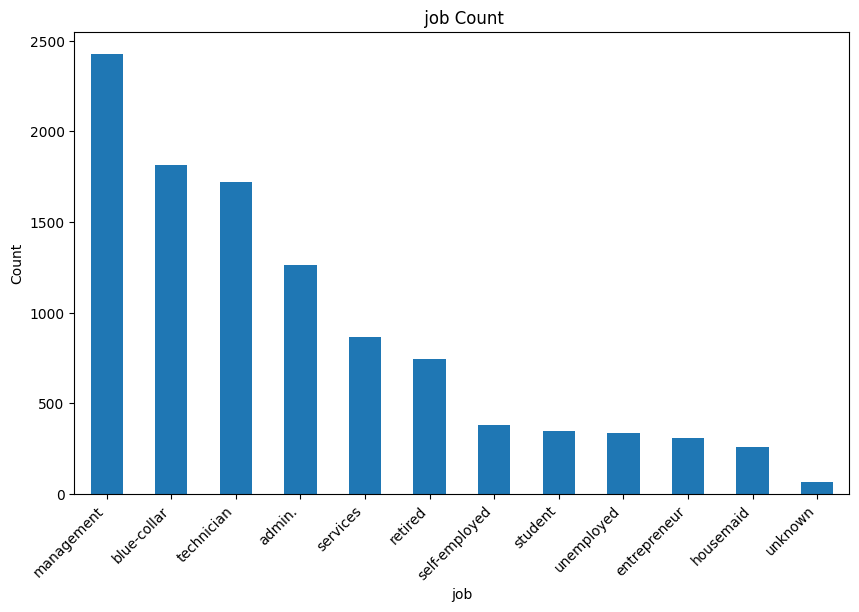

In [12]:
plt.figure(figsize=(10, 6))
Exited_counts = data_bank["job"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("job")
plt.ylabel("Count")
plt.title(" job Count")
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='education'>

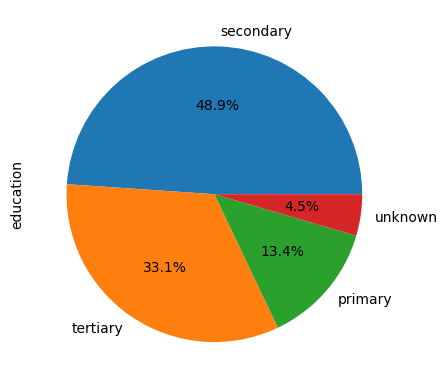

In [13]:
# Plotting the pie chart for education status
data_bank['education'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='contact'>

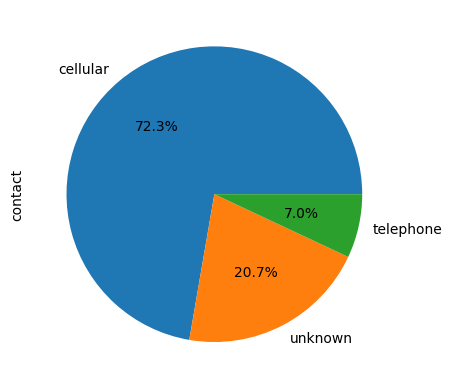

In [14]:
# Plotting the pie chart for contact status
data_bank['contact'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='campaign'>

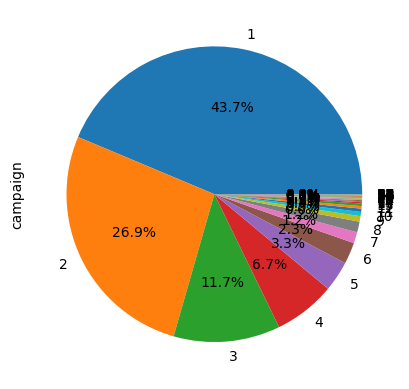

In [15]:
# Plotting the pie chart for campaign
data_bank['campaign'].value_counts().plot.pie(autopct='%1.1f%%')

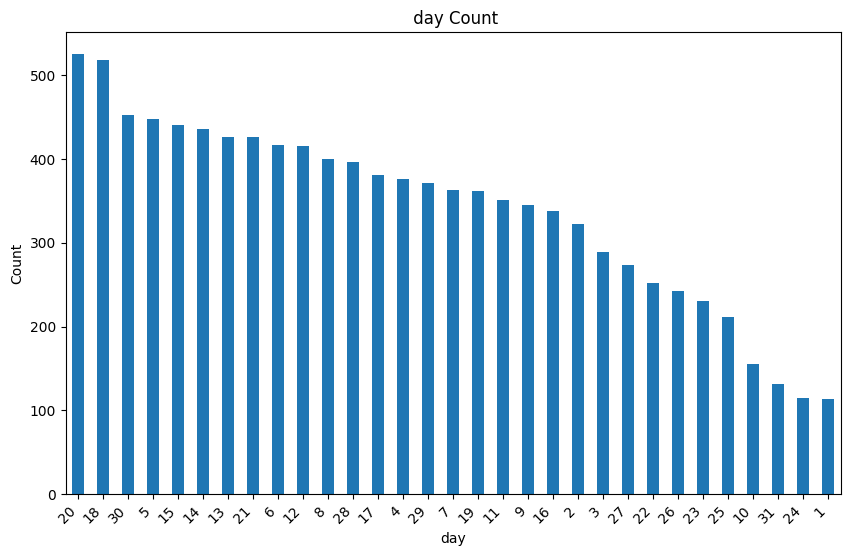

In [16]:
plt.figure(figsize=(10, 6))
Exited_counts = data_bank["day"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("day")
plt.ylabel("Count")
plt.title(" day Count")
plt.xticks(rotation=45, ha='right')
plt.show()

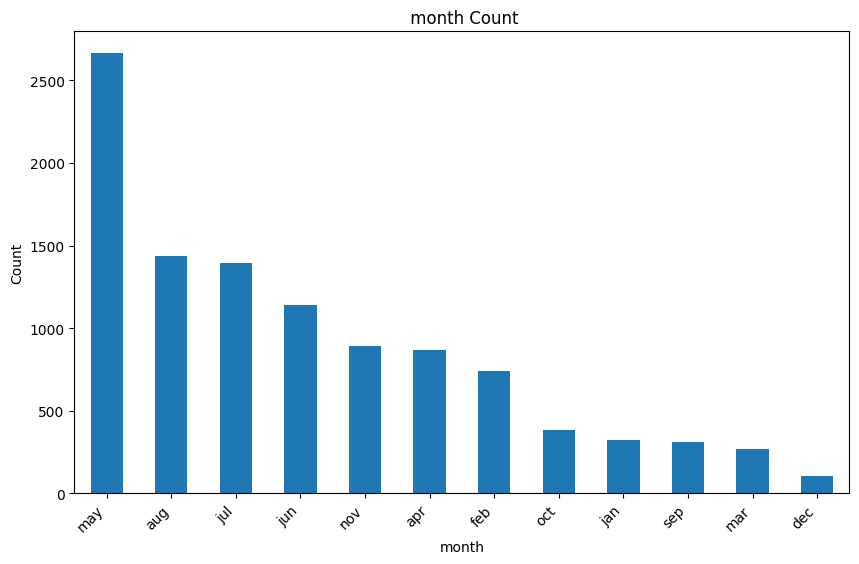

In [17]:
plt.figure(figsize=(10, 6))
Exited_counts = data_bank["month"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("month")
plt.ylabel("Count")
plt.title(" month Count")
plt.xticks(rotation=45, ha='right')
plt.show()

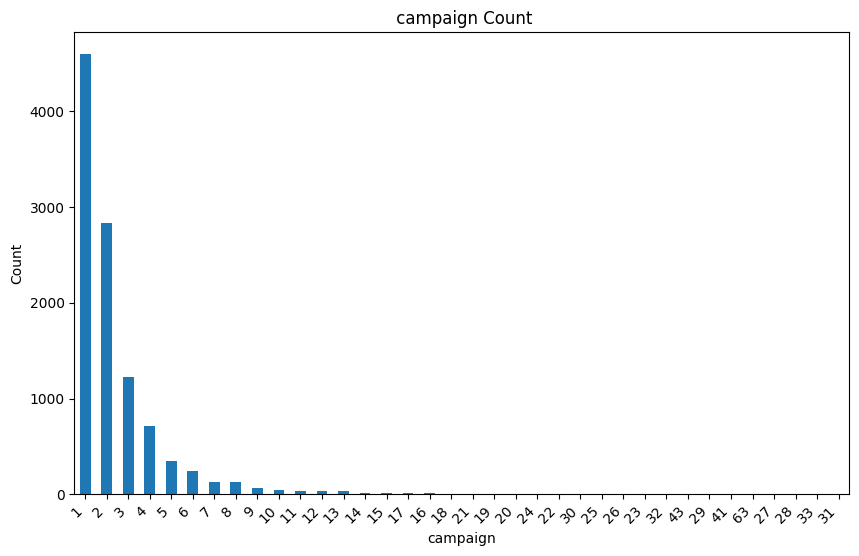

In [18]:
plt.figure(figsize=(10, 6))
Exited_counts = data_bank["campaign"].value_counts()
Exited_counts.plot(kind="bar")
plt.xlabel("campaign")
plt.ylabel("Count")
plt.title(" campaign Count")
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='poutcome'>

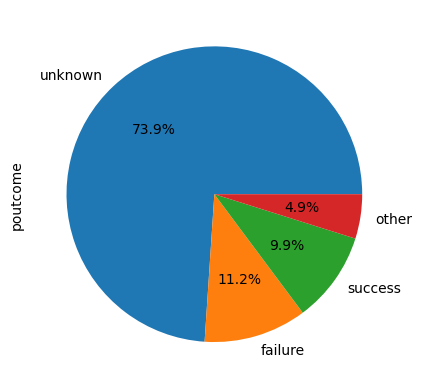

In [19]:
# Plotting the pie chart for poutcome
data_bank['poutcome'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='deposit'>

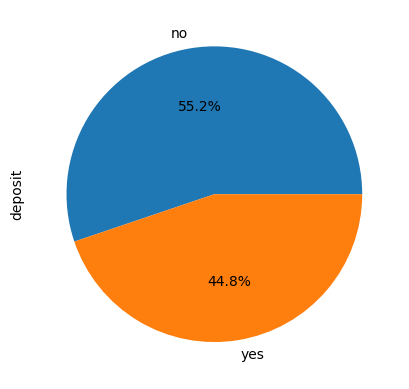

In [20]:
# Plotting the pie chart for deposit
data_bank['deposit'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='loan_yes'>

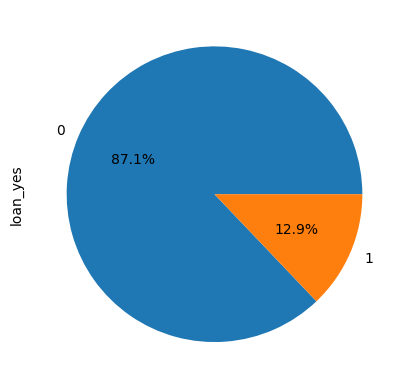

In [21]:
# Plotting the pie chart for loan_yes
data_bank['loan_yes'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='default_yes'>

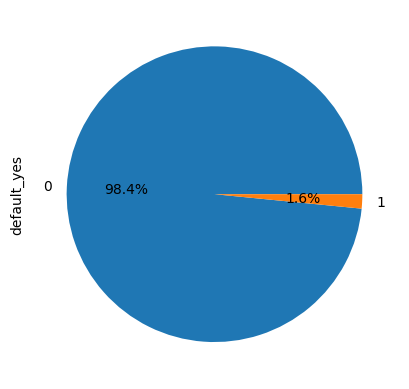

In [22]:
# Plotting the pie chart for default_yes
data_bank['default_yes'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: ylabel='housing_yes'>

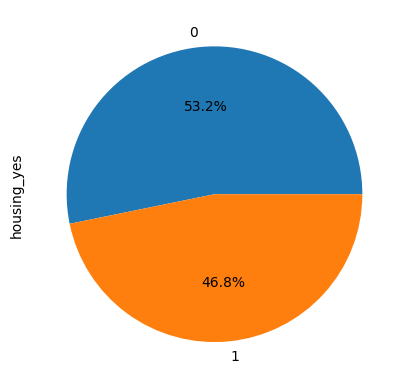

In [23]:
# Plotting the pie chart for housing_yes
data_bank['housing_yes'].value_counts().plot.pie(autopct='%1.1f%%')